In [15]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

from modules.expbuilder import default_params, run_exp

train_path = Path('../../../rf-chess-data/cropped_v1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Run two demo runs

In [10]:
my_params = [
    {'_test_path': test_path_all,
    '_train_seed': i} 
    for i in [99,22]]

In [11]:
for param in my_params:
    
    run_params = default_params.copy()
    run_params.update(param)
    
    run_exp(run_params, 
            name_base='basicexp',
            b_msg=True, 
            b_cuda=True)

starting training...


saving to name_base: basicexp-0
Finished with:

{'valid_loss': 0.058692194521427155, 'accuracy': 0.99303138256073}
{'test_loss': 0.49192729592323303, 'test_accuracy': 0.8421052694320679}


finished in 330.96 secs

starting training...


saving to name_base: basicexp-1
Finished with:

{'valid_loss': 0.11465831845998764, 'accuracy': 0.9895470142364502}
{'test_loss': 0.4792856276035309, 'test_accuracy': 0.8552631735801697}


finished in 331.34 secs



##### Verify results with second accuracy check
Shows we're not validating correctly

In [23]:
from modules.trainutils import my_test_metrics

In [24]:
df_test = pd.read_csv('../models/model-logs/basicexp-1_test.csv')

learn = load_learner('../models/basicexp-1.pkl')
learn.cbs.pop(3);  # Remove the TestSetRecorder

In [25]:
my_test_metrics(learn, test_path_all)

(0.4792857594960028, 0.8552631578947368)

In [26]:
df_test['test_loss'].iloc[-1], df_test['test_accuracy'].iloc[-1]

(0.4792856276035309, 0.8552631735801697)

##### Plot results

In [28]:
df_test = pd.read_csv('../models/model-logs/basicexp-1_test.csv')
df_valid = pd.read_csv('../models/model-logs/basicexp-1_valid.csv')

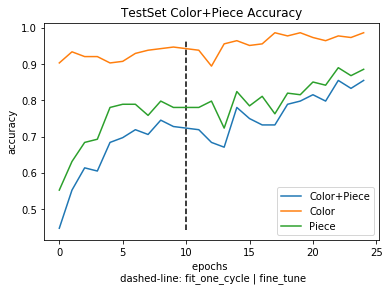

In [29]:
plt.plot(df_test['test_accuracy'], label='Color+Piece')
plt.plot(df_test['test_subcat_color_acc'], label='Color')
plt.plot(df_test['test_subcat_piece_acc'], label='Piece')

y0, y1 = plt.ylim()
plt.vlines(x=10, ymin=y0*1.05, ymax=y1*0.95, linestyles='dashed')

plt.title('TestSet Color+Piece Accuracy')
plt.xlabel('epochs \n dashed-line: fit_one_cycle | fine_tune')
plt.ylabel('accuracy')
plt.legend();
